In [1]:
import pandas as pd
import os
import seaborn as sns

In [46]:
samples_df = pd.read_csv("samples/imbalance_degree/normal/result/gini_accuracy_all_runs.csv")
samples_df = samples_df[(samples_df["Method"].isin(["RF+B","SPH", "SPH+CPI", "CPI"]))]
samples_df["Method"] = pd.Categorical(samples_df["Method"], ['RF+B','SPH', 'SPH+CPI', 'CPI'], ordered=True)
#samples_df["Method"] = pd.Categorical(samples_df["Method"], ['RF+B','SPH', 'SPH+CPI', 'CPI', 'KMeans', 'GMM', 'Birch','RF'], ordered=True)

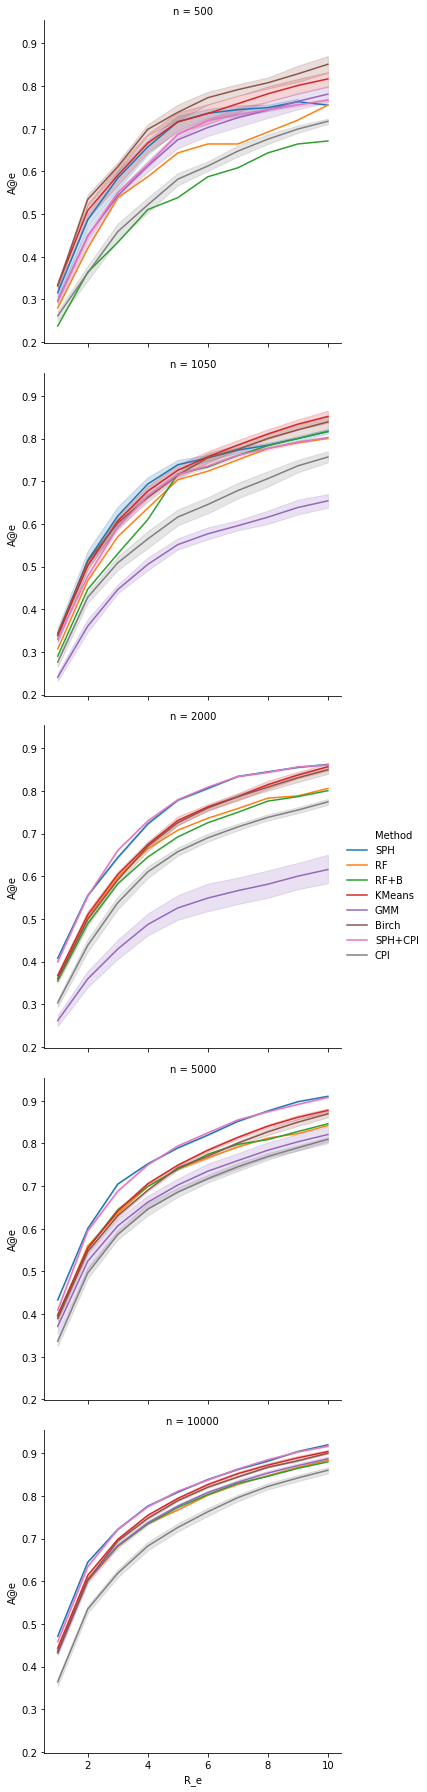

In [11]:
sns.relplot(data=samples_df, x="R_e", y="A@e", hue="Method", row="n", kind="line")

In [3]:
parameters = ["max info loss", "gini", "p value", "n_clusters"]
methods_to_parameters = {
    "SPH+CPI": ["max info loss", "gini", "p value"],
    "SPH": ["max info loss"],
    "KMeans": ["n_clusters"],
    "Birch": ["n_clusters"],
    "GMM": ["n_clusters"],
    "CPI": ["gini", "p value"],
    "RF": [],
    "RF+B": []
}

In [47]:
best_result_df = pd.DataFrame()
for n in samples_df["n"].unique():
    n_samples_df = samples_df[samples_df["n"] == n]
    # find best parameter for each method
    for method in n_samples_df["Method"].unique():
        method_df = n_samples_df[n_samples_df["Method"] == method]
        #print(method_df)
        first_position_df = method_df[(method_df["R_e"] == 1)]
        best_method_result = first_position_df[first_position_df["A@e"] == first_position_df["A@e"].max()]
        for parameter in methods_to_parameters[method]:
            parameter_value = best_method_result[parameter].values[0]
            if not parameter_value:
                continue
            method_df = method_df[method_df[parameter] == parameter_value]
        print(method_df)
        best_result_df = pd.concat([best_result_df, method_df])
best_result_df

   Method  R_e       A@e      RA@e  Run  max info loss    n    f  n_clusters  \
28    SPH    1  0.328671  1.000000    1           0.25  500  100         NaN   
29    SPH    2  0.503497  1.347222    1           0.25  500  100         NaN   
30    SPH    3  0.594406  1.600000    1           0.25  500  100         NaN   
31    SPH    4  0.664336  1.852632    1           0.25  500  100         NaN   
32    SPH    5  0.734266  2.152381    1           0.25  500  100         NaN   
33    SPH    6  0.748252  2.224299    1           0.25  500  100         NaN   
34    SPH    7  0.762238  2.311927    1           0.25  500  100         NaN   
35    SPH    8  0.762238  2.311927    1           0.25  500  100         NaN   
36    SPH    9  0.776224  2.432432    1           0.25  500  100         NaN   

   algorithm  n_components  gini  p value  
28       NaN           NaN   NaN      NaN  
29       NaN           NaN   NaN      NaN  
30       NaN           NaN   NaN      NaN  
31       NaN           

,Method,R_e,A@e,RA@e,Run,max info loss,n,f,n_clusters,algorithm,n_components,gini,p value
28,SPH,1,0.328671,1.000000,1,0.25,500,100,NaN,NaN,NaN,NaN,NaN
29,SPH,2,0.503497,1.347222,1,0.25,500,100,NaN,NaN,NaN,NaN,NaN
30,SPH,3,0.594406,1.600000,1,0.25,500,100,NaN,NaN,NaN,NaN,NaN
31,SPH,4,0.664336,1.852632,1,0.25,500,100,NaN,NaN,NaN,NaN,NaN
32,SPH,5,0.734266,2.152381,1,0.25,500,100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,CPI,6,0.775367,2.130866,1,NaN,10000,100,NaN,NaN,NaN,0.2,0.75
11662,CPI,7,0.808258,2.329004,1,NaN,10000,100,NaN,NaN,NaN,0.2,0.75
11663,CPI,8,0.833450,2.500420,1,NaN,10000,100,NaN,NaN,NaN,0.2,0.75
11664,CPI,9,0.851295,2.636663,1,NaN,10000,100,NaN,NaN,NaN,0.2,0.75


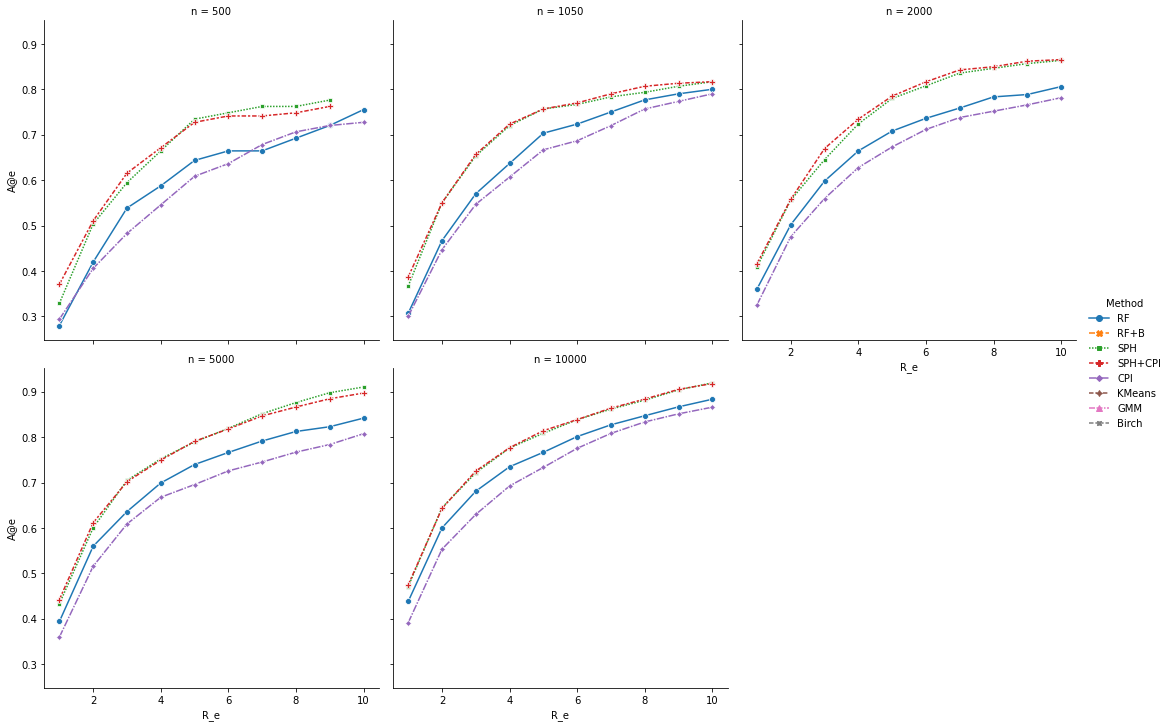

In [33]:
sns.relplot(data=best_result_df[best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "CPI"])], x="R_e", y="A@e", hue="Method", style="Method", markers=True,col="n", kind="line", col_wrap=3)

In [25]:
best_result_df[(best_result_df["Method"].isin(["SPH", "SPH+CPI", "RF", "CPI"])) & (best_result_df["R_e"] == 1)].groupby(["n", "Method"])["A@e"].mean()

n      Method 
500    RF         0.279720
       SPH        0.328671
       RF+B       0.237762
       KMeans     0.363636
       GMM             NaN
       Birch      0.356643
       SPH+CPI    0.370629
       CPI        0.293706
1050   RF         0.306667
       SPH        0.366667
       RF+B       0.290000
       KMeans     0.376667
       GMM             NaN
       Birch      0.356667
       SPH+CPI    0.386667
       CPI        0.300000
2000   RF         0.360140
       SPH        0.409091
       RF+B       0.354895
       KMeans     0.393357
       GMM             NaN
       Birch      0.377622
       SPH+CPI    0.416084
       CPI        0.325175
5000   RF         0.393982
       SPH        0.433170
       RF+B       0.397481
       KMeans     0.408677
       GMM             NaN
       Birch      0.399580
       SPH+CPI    0.442267
       CPI        0.359692
10000  RF         0.438069
       SPH        0.470959
       RF+B       0.434220
       KMeans     0.449615
       GMM   

Text(0, 0.5, 'A@1 Accuracy')

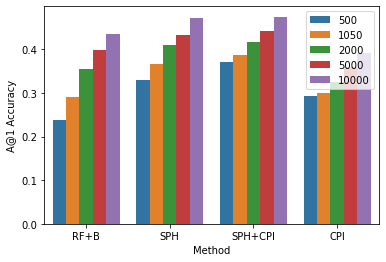

In [48]:
ax = sns.barplot(hue="n", x="Method", y="A@e", data=best_result_df[(best_result_df["Method"].isin(["RF+B","SPH", "SPH+CPI", "CPI"])) & (best_result_df["R_e"] == 1)])
ax.legend(loc="upper right")
ax.set_ylabel("A@1 Accuracy")

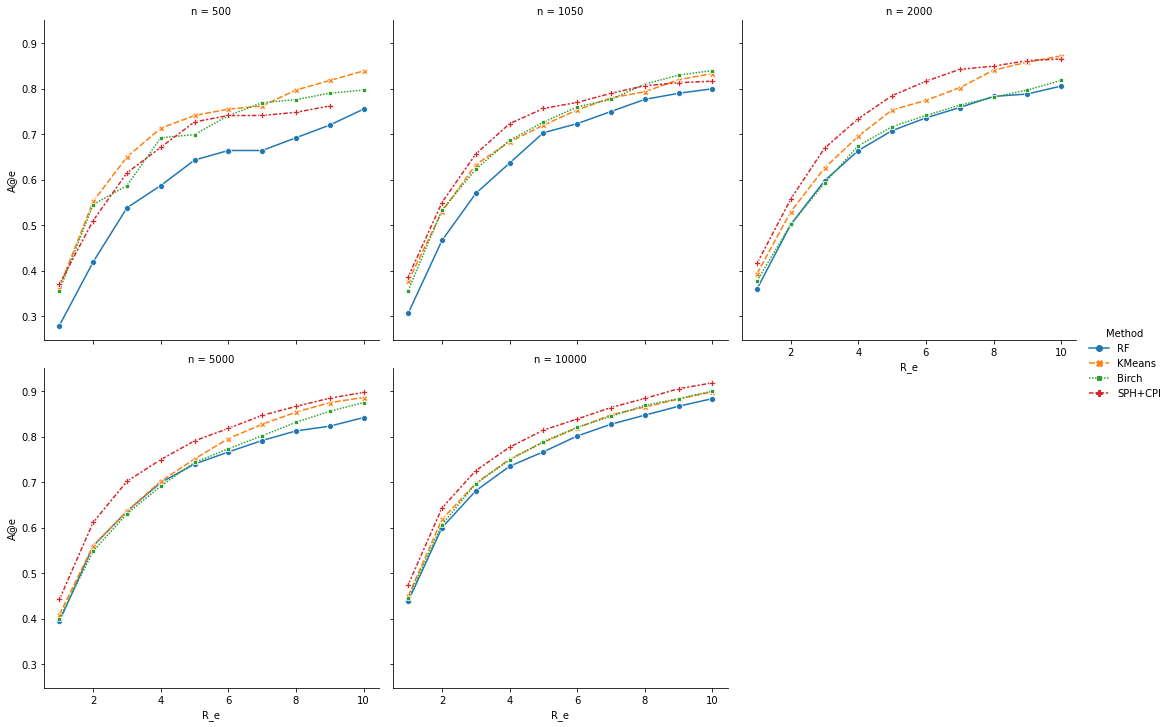

In [7]:
sns.relplot(data=best_result_df[best_result_df["Method"].isin([ "SPH+CPI", "RF", "KMeans", "Birch"])], x="R_e", y="A@e", hue="Method",style="Method", markers=True, col="n", kind="line", col_wrap=3)

In [68]:
best_parameter_df = pd.DataFrame()
for n in best_result_df["n"].unique():
    #print("--------------------------------------")
    #print(f"n={n}")
    best_n_samples = best_result_df[best_result_df["n"] == n]
    for method in best_n_samples["Method"].unique():
        param_df = best_n_samples[(best_n_samples["Method"] == method) & (best_n_samples["R_e"] == 1)][methods_to_parameters[method]]
        #print(f"Method {method} has best parameters:")
        #print(param_df)
        #print("--------------------------------------")
        param_df["Method"] = method
        param_df["n"] = n
        best_parameter_df = pd.concat([best_parameter_df, param_df])
    
best_parameter_df

,max info loss,Method,n,n_clusters,gini,p value
28,0.25,SPH,500,NaN,NaN,NaN
61,NaN,RF,500,NaN,NaN,NaN
71,NaN,RF+B,500,NaN,NaN,NaN
101,NaN,KMeans,500,20.0,NaN,NaN
371,NaN,Birch,500,50.0,NaN,NaN
1856,0.40,SPH+CPI,500,NaN,0.20,0.70
2086,NaN,CPI,500,NaN,0.20,0.70
2386,0.35,SPH,1050,NaN,NaN,NaN
2406,NaN,RF,1050,NaN,NaN,NaN
2416,NaN,RF+B,1050,NaN,NaN,NaN
